In [2]:
import pandas as pd
pd.set_option('display.max_columns', 100)
import numpy as np
import matplotlib.pyplot as plt

from plotly import express as px
import cufflinks
cufflinks.go_offline()

from pprint import pprint
from glob import glob

import sys
sys.path.append('../')

from src.data.gibdd_filter import GibddFilter
# from src.data import normalize_name

import warnings
warnings.simplefilter('ignore')

In [17]:
tmp.query('VIN == "WMA18WZZ8CP037779"')

,СОАТО,Тип т/с,Дата регистрации,Дата операции,Товар,Марка,Модель,Класс,Тип,Происхождение,Кузов,Кол фор-ла,Год,VIN,N куз,N двиг,N шасси,номер,Первичность,Принадлежность,Мощность,Объем,Тип двигателя,Правосторонность руля,Код т/с,Комментарий к коду тс,Максимальная масса,Масса без нагрузки,Владелец-1,ИНН,Район,Город,Улица,Дом,Корпус,Квартира,ID1,Район новый,Министерство,Страна,Экология,Тип кузова,Надстройщик,количество,страна по VIN,регион по VIN,Производитель по VIN,Производитель город по VIN,Производитель страна по VIN,Описание(вид),Описание(тип),Производитель,сфера,код ОКВЭД,наименование деятельности,тип 99,Марка_Модель,Марка_Модель_Производитель,Сегмент СМР/НМР,Подсегмент,Тип кузова 2,Мост,Марка_Кузов_Надстройщик
264805,1180,С,2019-03-19 00:00:00,2019-03-19 00:00:00,МАН ТGS 26.350,MAN,26.350,HDT3,G,И,NaN,6X4,2012.0,WMA18WZZ8CP037779,50531870043190,876136,WMA18WZZ8CP037779,P037779,45,1.0,350,10518.0,4.0,1.0,3.0,ГРУЗОВОЙ ФУРГОН,26000.0,11000.0,ЗАО ТАНДЕР,2.310031e+09,СМОЛЕНСКИЙ Р-Н.,Д ПОКОРНОЕ,NaN,NaN,NaN,NaN,20278,Из другого региона,NaN,EU,Евро-4,Фургон,MAN Truck & Bus,1,Germany,Европа,NaN,NaN,NaN,Фургон,NaN,Большая семерка,Нефтегазодобывающая,47.19,Торговля розничная преимущественно пищевыми пр...,Легкие технологические,MAN_26.350,MAN_26.350_Большая семерка,НМР,NaN,Спецтехника,NaN,NaN
874063,1180,С,2019-12-26 00:00:00,2019-12-26 00:00:00,МАН ТGS 26 350 6Х2-2 ВL WW,MAN,26.350,HDT3,G,И,NaN,6X2,2012.0,WMA18WZZ8CP037779,50531870043190,876136,WMA18WZZ8CP037779,P037779,45,1.0,350,10518.0,4.0,1.0,3.0,ГРУЗОВОЙ ФУРГОН,26000.0,11000.0,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""ТАНДЕР""",2.310031e+09,Р-Н КОЛЬСКИЙ,НП ЗВЕРОСОВХОЗ,NaN,NaN,NaN,NaN,25691,Из другого региона,NaN,EU,Евро-4,Фургон,MAN Truck & Bus,1,Germany,Европа,NaN,NaN,NaN,Фургон,NaN,Большая семерка,Торговля,NaN,Торговля розничная преимущественно пищевыми пр...,Легкие технологические,NaN,NaN,НМР,NaN,Спецтехника,NaN,NaN


In [19]:
tmp.loc[tmp['VIN'].isin(tmp.groupby('VIN')['Марка'].nunique().sort_values().tail(10).index)].sort_values('VIN')

,СОАТО,Тип т/с,Дата регистрации,Дата операции,Товар,Марка,Модель,Класс,Тип,Происхождение,Кузов,Кол фор-ла,Год,VIN,N куз,N двиг,N шасси,номер,Первичность,Принадлежность,Мощность,Объем,Тип двигателя,Правосторонность руля,Код т/с,Комментарий к коду тс,Максимальная масса,Масса без нагрузки,Владелец-1,ИНН,Район,Город,Улица,Дом,Корпус,Квартира,ID1,Район новый,Министерство,Страна,Экология,Тип кузова,Надстройщик,количество,страна по VIN,регион по VIN,Производитель по VIN,Производитель город по VIN,Производитель страна по VIN,Описание(вид),Описание(тип),Производитель,сфера,код ОКВЭД,наименование деятельности,тип 99,Марка_Модель,Марка_Модель_Производитель,Сегмент СМР/НМР,Подсегмент,Тип кузова 2,Мост,Марка_Кузов_Надстройщик
377786,1104,С,2019-05-07 00:00:00,2019-05-07 00:00:00,ГАЗ 5201 МЖ1125,ГАЗ,5201,MCV,G,О,NaN,4X2,1986.0,0TCYTCTBYET,NaN,0TCYTCTBYET,NaN,TCTBYET,94,2.0,90,3480.0,1.0,1.0,3.0,ГРУЗОВОЙ ФУРГОН,5450.0,3550.0,ФИЗ ЛИЦО,NaN,КЕЖЕМСКИЙ Р-Н.,Г КОДИНСК,NaN,NaN,NaN,NaN,15242,Кежемский,NaN,RU,Евро-1,Фургон,NaN,1,NaN,NaN,NaN,NaN,NaN,Фургон,NaN,ГАЗ,ФИЗ ЛИЦО,NaN,NaN,Легкие до 8 тонн,ГАЗ_5201,ГАЗ_5201_ГАЗ,СМР,NaN,Спецтехника,NaN,NaN
675860,1152,С,2019-10-22 00:00:00,2019-10-22 00:00:00,ГАЗ 53Б,ГАЗ,53,MDT1,G,О,NaN,4X2,1983.0,0TCYTCTBYET,NaN,0TCYTCTBYET,NaN,TCTBYET,44,2.0,116,4250.0,2.0,1.0,5.0,ГРУЗОВОЙ САМОСВАЛ,6270.0,3080.0,ФИЗ ЛИЦО,NaN,АЗОВСКИЙ НЕМЕЦКИЙ НАЦИОНАЛЬНЫЙ Р-Н.,Д СЕРЕБРОПОЛЬЕ,NaN,NaN,NaN,NaN,11845,Азовский немецкий национальный,NaN,RU,Евро-1,Самосвал,NaN,1,NaN,NaN,NaN,NaN,NaN,Самосвал,NaN,ГАЗ,ФИЗ ЛИЦО,NaN,NaN,Легкие до 8 тонн,NaN,NaN,СМР,NaN,Самосвал,NaN,NaN
448169,1104,С,2019-06-04 00:00:00,2019-06-04 00:00:00,ЗИЛ 133ГЯ,ЗИЛ,133,MDT1,G,О,NaN,6X4,1988.0,0TCYTCTBYET,0NCENCNDETN,0TCYTCTBYET,0TCYTCTBYET,TCTBYET,41,2.0,"210,09999999999999",10850.0,1.0,2.0,9.0,ГРУЗОВОЙ ПРОЧЕЕ,17835.0,7610.0,ФИЗ ЛИЦО,NaN,БОГУЧАНСКИЙ Р-Н.,П ОКТЯБРЬСКИЙ,NaN,NaN,NaN,NaN,16121,Богучанский,NaN,RU,Евро-1,Грузовые прочие,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ЗИЛ,ФИЗ ЛИЦО,NaN,NaN,Легкие до 8 тонн,ЗИЛ_133,ЗИЛ_133_ЗИЛ,СМР,NaN,Спецтехника,NaN,NaN
443224,1104,С,2019-06-08 00:00:00,2019-06-08 00:00:00,УАЗ 452Д,УАЗ,452Д,LCV1,G,О,NaN,4X4,1982.0,0TCYTCTBYET,NaN,0TCYTCTBYET,NaN,TCTBYET,41,2.0,75,2445.0,1.0,1.0,1.0,ГРУЗОВОЙ БОРТОВОЙ,2660.0,1700.0,ФИЗ ЛИЦО,NaN,КЕЖЕМСКИЙ Р-Н.,Г КОДИНСК,NaN,NaN,NaN,NaN,4551,Кежемский,NaN,RU,Евро-1,Бортовой,NaN,1,NaN,NaN,NaN,NaN,NaN,Бортовой,NaN,Прочие,ФИЗ ЛИЦО,NaN,NaN,Легкие до 8 тонн,УАЗ_452Д,УАЗ_452Д_Прочие,СМР,NaN,Бортовой,NaN,NaN
362133,1104,С,2019-05-21 00:00:00,2019-05-21 00:00:00,ГАЗ 66,ГАЗ,66,MCV,G,О,NaN,4X2,1980.0,0TCYTCTBYET,090389,0TCYTCTBYET,NaN,TCTBYET,94,2.0,130,6000.0,1.0,1.0,1.0,ГРУЗОВОЙ БОРТОВОЙ,5970.0,3640.0,ФИЗ ЛИЦО,NaN,БОГУЧАНСКИЙ Р-Н.,П ПИНЧУГА,NaN,NaN,NaN,NaN,15522,Богучанский,NaN,RU,Евро-1,Бортовой,NaN,1,NaN,NaN,NaN,NaN,NaN,Бортовой,NaN,ГАЗ,ФИЗ ЛИЦО,NaN,NaN,Легкие до 8 тонн,ГАЗ_66,ГАЗ_66_ГАЗ,СМР,NaN,Бортовой,NaN,NaN
313518,1122,С,2019-04-19 00:00:00,2019-04-19 00:00:00,ГАЗ 63,ГАЗ,63,MCV,G,О,NaN,4X2,1966.0,0TCYTCTBYET,NaN,0TCYTCTBYET,3738090,3738090,94,2.0,70,3480.0,1.0,1.0,1.0,ГРУЗОВОЙ БОРТОВОЙ,5350.0,3200.0,ФИЗ ЛИЦО,NaN,КСТОВСКИЙ Р-Н.,Д ВЕТЧАК,NaN,NaN,NaN,NaN,19112,Кстовский,NaN,RU,Евро-1,Бортовой,NaN,1,NaN,NaN,NaN,NaN,NaN,Бортовой,NaN,ГАЗ,ФИЗ ЛИЦО,NaN,NaN,Легкие до 8 тонн,ГАЗ_63,ГАЗ_63_ГАЗ,СМР,NaN,Бортовой,NaN,NaN
127257,1105,С,2019-06-21 00:00:00,2019-06-21 00:00:00,68637А,SCANIA,P480CB,HDT3,G,С,68637A,6X6,2019.0,X4P68637AK0000070,8332813,X4P68637AK0000070,9BSG6X60003942372,3942372,44,2.0,"479,89999999999998",12740.0,4.0,1.0,9.0,ГРУЗОВОЙ ПРОЧЕЕ,39000.0,13750.0,ФИЗ ЛИЦО,NaN,NaN,Г ДАЛЬНЕРЕЧЕНСК,NaN,NaN,NaN,NaN,13001,Дальнереченский,NaN,EU,Евро-5,Сортиментовоз,Новосибирский авторемонтный завод,1,Russia,Европа,NaN,NaN,NaN,Прочие,Сортиментовоз,Большая семерка,ФИЗ ЛИЦО,NaN,NaN,Тяжелые,SCANIA_P480CB,SCANIA_P480CB_Большая семерка,НМР,Лесозаготовительная техника,Спецтехника,NaN,SCANIA_68637A_Новосибирский авторемонтный завод
206968,1105,С,2019-05-13 00:00:00,2019-05-13 00:00:00,68637А,Не известна,Не известна,HDT3,G,С,68637A,

In [6]:
tmp = pd.read_csv('/home/jovyan/remote_shared_data/dsdiag222/gibdd_dataset_raw/trucks_2019.csv', delimiter=';', error_bad_lines=False)

b'Skipping line 1903: expected 63 fields, saw 64\nSkipping line 2145: expected 63 fields, saw 64\nSkipping line 3416: expected 63 fields, saw 64\nSkipping line 3417: expected 63 fields, saw 64\nSkipping line 3418: expected 63 fields, saw 64\nSkipping line 3419: expected 63 fields, saw 64\nSkipping line 3421: expected 63 fields, saw 64\nSkipping line 3422: expected 63 fields, saw 64\nSkipping line 3423: expected 63 fields, saw 64\nSkipping line 3432: expected 63 fields, saw 64\nSkipping line 3434: expected 63 fields, saw 64\nSkipping line 3435: expected 63 fields, saw 64\nSkipping line 3436: expected 63 fields, saw 64\nSkipping line 3439: expected 63 fields, saw 64\nSkipping line 3440: expected 63 fields, saw 64\nSkipping line 3441: expected 63 fields, saw 64\nSkipping line 3442: expected 63 fields, saw 64\nSkipping line 3443: expected 63 fields, saw 64\nSkipping line 3451: expected 63 fields, saw 64\nSkipping line 4238: expected 63 fields, saw 64\nSkipping line 4241: expected 63 fields

In [171]:
!python ../src/data/make_dataset.py /home/jovyan/remote_shared_data/dsdiag222/gibdd_dataset_raw/ ../data/raw/gibdd.parquet

2020-09-03 09:05:36,245 - __main__ - INFO - making final data set from raw data
['/home/jovyan/remote_shared_data/dsdiag222/gibdd_dataset_raw/trucks_2012.csv',
 '/home/jovyan/remote_shared_data/dsdiag222/gibdd_dataset_raw/trucks_2013.csv',
 '/home/jovyan/remote_shared_data/dsdiag222/gibdd_dataset_raw/trucks_2014.csv',
 '/home/jovyan/remote_shared_data/dsdiag222/gibdd_dataset_raw/trucks_2015.csv',
 '/home/jovyan/remote_shared_data/dsdiag222/gibdd_dataset_raw/trucks_2016.csv',
 '/home/jovyan/remote_shared_data/dsdiag222/gibdd_dataset_raw/trucks_2017.csv',
 '/home/jovyan/remote_shared_data/dsdiag222/gibdd_dataset_raw/trucks_2018.csv',
 '/home/jovyan/remote_shared_data/dsdiag222/gibdd_dataset_raw/trucks_2019.csv',
 '/home/jovyan/remote_shared_data/dsdiag222/gibdd_dataset_raw/trucks_2020.csv']
/opt/conda/lib/python3.7/site-packages/click/core.py:1066: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  return ctx.invoke(self.callback, **ctx.p

In [172]:
PATH_CODES = '/home/jovyan/shared_data/data/GibddCodes/'
files_codes = glob(PATH_CODES+'*.xlsx')
pprint(files_codes)

df_codets = pd.read_excel(files_codes[0], index_col=[0])
df_region = pd.read_excel(files_codes[1], index_col=[0])
df_class = pd.read_excel(files_codes[2], index_col=[0])
df_source = pd.read_excel(files_codes[3], index_col=[0])
df_primary = pd.read_excel(files_codes[4], index_col=[0])
df_type = pd.read_excel(files_codes[5], index_col=[0])

['/home/jovyan/shared_data/data/GibddCodes/kod_ts.xlsx',
 '/home/jovyan/shared_data/data/GibddCodes/region.xlsx',
 '/home/jovyan/shared_data/data/GibddCodes/class.xlsx',
 '/home/jovyan/shared_data/data/GibddCodes/proshozhdenie.xlsx',
 '/home/jovyan/shared_data/data/GibddCodes/kod_op.xlsx',
 '/home/jovyan/shared_data/data/GibddCodes/tip_auto.xlsx']


# FILTER DATA

In [173]:
df = pd.read_parquet('../data/raw/gibdd.parquet')
df.set_index('operation_date', inplace=True)

In [174]:
display(df.sample(5))
print(df.shape)

,coato,vehicle_type,registration_date,brand,model,class,origin,chassis_config,year,vin,primary,affiliation,code,mass_max,mass_idle,inn,region,city,body_type,activity_field
operation_date,,,,,,,,,,,,,,,,,,,,
2017-09-29,1132,С,2017-09-29,ГАЗ,2705,LCV2,О,4X2,1998,XTH270500W0094642,94,2,3,3500,2000,None,None,КЕМЕРОВО Г.,Фургон,ФИЗ ЛИЦО
2013-11-16,1146,С,2001-01-01,MAN,19.400,HDT2,И,4X2,2013,WMA06WZZ0EP048229,11,1,4,18000,7575,5077016813,СЕРПУХОВСКИЙ Р-Н,ВОЛОХОВО,Тягач седельный,None
2019-03-26,1152,С,2019-03-26,УАЗ,390945,LCV1,О,4X4,2013,XTT390945D0499808,94,2,1,3070,1995,None,КРУТИНСКИЙ Р-Н.,С ПАНОВО,Бортовой,ФИЗ ЛИЦО
2017-03-29,1180,С,2017-03-29,PEUGEOT,PARTNER,LCV2,И,4X2,2008,VF3GCKFWC8J083505,94,2,3,2010,1055,None,None,УФА Г.,Фургон,ФИЗ ЛИЦО
2015-05-13,1146,С,2001-01-01,LADA,2347,LCV1,О,4X2,2004,X6D23470040001165,94,2,3,1850,1210,None,None,ПОДОЛЬСК,Фургон,None


(7021374, 20)


### FILTER COLUMNS 

In [175]:
df = GibddFilter(df).filter_data().df
print(df.shape)

filter_inn
filter_vin
filter_class
filter_mass
filter_brand
filter_vehicle
filter_model
filter_year
(2088946, 20)


### REGION COLUMNS

In [176]:
df['coato'] = df['coato'].apply(normalize_name).astype(int)
df_region = pd.read_excel(files_codes[1], index_col=[0])
df = pd.merge(df, df_region, left_on='coato', right_index=True, how='left')

### PRIMARY COLUMN

In [177]:
df['primary'] = df['primary'].astype(float).astype(int)
df_primary.rename({
    'Расшифровка': 'operation_reason'
    }, 
    axis=1,
    inplace=True)
df = pd.merge(df, df_primary, left_on='primary', right_index=True, how='left')

In [178]:
display(df.sample(5))
print(df.shape)

,coato,vehicle_type,registration_date,brand,model,class,origin,chassis_config,year,vin,primary,affiliation,code,mass_max,mass_idle,inn,region,city,body_type,activity_field,Наименование,Федеральный округ до 2011,Федеральный округ,operation_reason
operation_date,,,,,,,,,,,,,,,,,,,,,,,,
2018-04-20,1145,С,NaT,VOLVO,FM TRUCK,HDT3,С,8x4,2018.0,X9PXG10G9JW122725,11,1,None,NaN,16384.0,7729550541,None,None,Самосвал,Коммерческие перевозки,Москва,Центральный ФО,Центральный ФО,первичная регистрация
2019-10-30,1192,С,2019-10-30,КАМАЗ,65115,HDT3,О,6x4,2013.0,X1F651153D0004065,94,2,5,NaN,10625.0,None,АКСУБАЕВСКИЙ Р-Н.,ПГТ АКСУБАЕВО,Самосвал,ФИЗ ЛИЦО,Татарстан,Приволжский ФО,Приволжский ФО,"Изменение собственника по сделкам, произведенн..."
2020-02-20,1166,С,2020-02-20,МАЗ,4380Р2,HDT1,С,4x2,2017.0,X5H450084H0000002,94,1,59.0,NaN,6955.0,6732054083,None,Г СМОЛЕНСК,Спец,None,Смоленская область,Центральный ФО,Центральный ФО,"Изменение собственника по сделкам, произведенн..."
2018-03-13,1197,С,2018-03-13,ГАЗ,3307,MDT1,О,4x4,1994.0,XTH330730R1541589,94,2,1,NaN,NaN,None,ЧЕБОКСАРСКИЙ Р-Н.,Д КОСНАРЫ,Бортовой,ФИЗ ЛИЦО,Чувашия,Приволжский ФО,Приволжский ФО,"Изменение собственника по сделкам, произведенн..."
2018-02-07,1160,С,2018-02-07,КАМАЗ,4308,HDT1,О,4x2,2016.0,X9H47415EGA000179,44,1,3,NaN,6810.0,6166063743,None,Г РОСТОВ-НА-ДОНУ,Фургон,Коммерческие перевозки,Ростовская область,Южный ФО,Южный ФО,"замена номерного агрегата, цвета, изменение ко..."


(2088946, 24)


In [179]:
df.to_parquet('../data/processed/gibdd.parquet')

# RENEWED AUTO

In [72]:
df = pd.read_parquet('../data/processed/gibdd.parquet')

In [73]:
print('Unique inns:',df['inn'].nunique())

Unique inns: 167883


In [74]:
MIN_CARPARK_SIZE = 50

In [81]:
new_auto = (df['operation_reason'] == 'первичная регистрация')
tmp = pd.concat([
    new_auto.groupby(df['inn']).agg(['count', 'mean']), 
    df['vin'].groupby(df['inn']).nunique().to_frame('nunique')
], axis=1)

In [92]:
tmp = tmp[tmp['nunique'] > MIN_CARPARK_SIZE]
tmp = tmp.sort_values('mean', ascending=False)
new_carpark = tmp.copy()

In [91]:
new_carpark.head()

,count,mean,nunique
inn,,,
2310177273,96,1.0,96
1650242175,88,1.0,88
6508010313,79,1.0,79
1655377218,66,1.0,66
9701043714,51,1.0,51


In [153]:
new_carpark.head(100).sample(10)

,count,mean,nunique
inn,,,
6511000731,65,0.953846,65
5032073106,552,0.934783,544
7814448098,66,0.909091,66
1650242175,88,1.000000,88
1644069934,310,0.932258,290
7704513178,60,0.916667,60
1650294751,284,0.894366,255
1650288469,161,0.987578,160
7710884741,56,0.982143,56


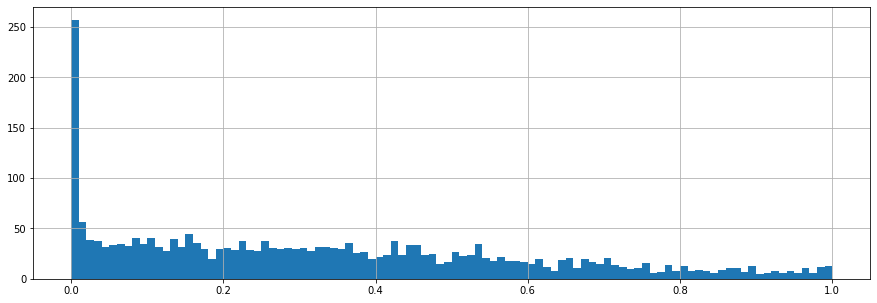

In [154]:
new_carpark['mean'].hist(bins=100, figsize=(15,5))
plt.show()

### сезонность покупки новых авто для каждой инн

In [96]:
df = df[df['operation_reason'] == 'первичная регистрация']

In [99]:
df

,coato,vehicle_type,registration_date,brand,model,class,origin,chassis_config,year,vin,primary,affiliation,code,mass_max,mass_idle,inn,region,city,activity_field,Наименование,Федеральный округ до 2011,Федеральный округ,operation_reason
operation_date,,,,,,,,,,,,,,,,,,,,,,,
2013-01-15,1111,С,2013-01-15,КАМАЗ,43118,HDT2,О,6x6,2012.0,X89637211C0EM2028,11,1,9,NaN,11740.0,2901221866,АРХАНГЕЛЬСК. ОБЛ,АРХАНГЕЛЬСК Г,Лесная,Архангельская область,Северо-Западный ФО,Северо-Западный ФО,первичная регистрация
2013-01-15,1111,С,2013-01-15,КАМАЗ,43118,HDT2,О,6x6,2012.0,X89637210C0EM2030,11,1,9,NaN,9590.0,2901221866,АРХАНГЕЛЬСК. ОБЛ,АРХАНГЕЛЬСК Г,Лесная,Архангельская область,Северо-Западный ФО,Северо-Западный ФО,первичная регистрация
2013-01-10,1146,С,2001-01-01,HYUNDAI,HD78,MDT1,И,4x2,2012.0,XUH27990AC0000918,11,1,3,NaN,NaN,5075019819,РУЗСКИЙ Р-Н,ДОРОХОВО,None,Московская область,Центральный ФО,Центральный ФО,первичная регистрация
2013-01-10,1146,С,2001-01-01,КАМАЗ,43253,HDT2,О,4x2,2012.0,X5V580421C0000280,11,1,59,NaN,8100.0,5032033791,ОДИНЦОВСКИЙ Р-Н,ГОЛИЦЫНО,None,Московская область,Центральный ФО,Центральный ФО,первичная регистрация
2013-01-10,1146,С,2001-01-01,КАМАЗ,43253,HDT2,О,4x2,2012.0,X5V580421C0000281,11,1,59,NaN,8100.0,5032033791,ОДИНЦОВСКИЙ Р-Н,ГОЛИЦЫНО,None,Московская область,Центральный ФО,Центральный ФО,первичная регистрация
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-06,1122,С,2020-03-06,ГАЗ,33088,MDT1,О,4x4,2019.0,XUY3813G0L0000809,11,1,55.0,NaN,5450.0,5260200603,None,Г НИЖНИЙ НОВГОРОД,None,Нижегородская область,Приволжский ФО,Приволжский ФО,первичная регистрация
2020-03-06,1122,С,2020-03-06,ГАЗ,33088,MDT1,О,4x4,2019.0,XUY3813G0L0000810,11,1,55.0,NaN,5450.0,5260200603,None,Г НИЖНИЙ НОВГОРОД,None,Нижегородская область,Приволжский ФО,Приволжский ФО,первичная регистрация
2020-03-06,1122,С,2020-03-06,ГАЗ,C41RB3,MDT2,О,4x2,2020.0,Z783010GDL0061957,11,1,1.0,NaN,5250.0,5036170703,None,Г ПОДОЛЬСК,None,Нижегородская область,Приволжский ФО,Приволжский ФО,первичная регистрация


In [101]:
%time tmp = df.groupby('inn')['vin'].resample('1M').nunique()

CPU times: user 19min 34s, sys: 1 s, total: 19min 35s
Wall time: 19min 35s


In [106]:
tmp.to_frame().to_parquet('../data/processed/new_vin_per_inn.parquet')

In [119]:
s = df.groupby('inn')['vin'].nunique()
inn_list = s[s > 50].index

5027130077


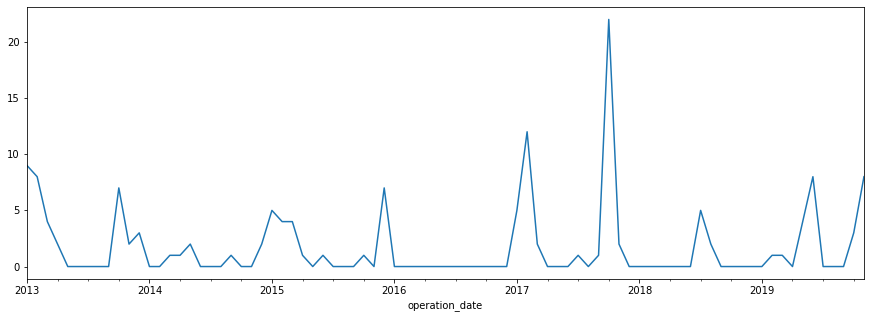

In [151]:
# rand_inn = np.random.choice(inn_list)
print(rand_inn)
tmp.loc[rand_inn].plot(figsize=(15,5))
plt.show()

In [155]:
!ls /home/jovyan/remote_shared_data/dsdiag222/gibdd_dataset_raw/

trucks_2012.csv  trucks_2015.csv  trucks_2018.csv
trucks_2013.csv  trucks_2016.csv  trucks_2019.csv
trucks_2014.csv  trucks_2017.csv  trucks_2020.csv


In [157]:
tmp = pd.read_csv('/home/jovyan/remote_shared_data/dsdiag222/gibdd_dataset_raw/trucks_2020.csv', delimiter=';',)

In [158]:
tmp

,СОАТО,Тип т/с,Дата регистрации,Дата операции,Товар,Марка,Модель,Класс,Тип,Происхождение,Кузов,Кол фор-ла,Год,VIN,N куз,N двиг,N шасси,номер,Первичность,Принадлежность,Мощность,Объем,Тип двигателя,Правосторонность руля,Код т/с,Комментарий к коду тс,Максимальная масса,Масса без нагрузки,Владелец-1,ИНН,Район,Город,Улица,Дом,Корпус,Квартира,ID1,Район новый,Министерство,Страна,Экология,Тип кузова,Надстройщик,количество,страна по VIN,регион по VIN,Производитель по VIN,Производитель город по VIN,Производитель страна по VIN,Описание(вид),Описание(тип),Производитель,сфера,код ОКВЭД,наименование деятельности,тип 99,Марка_Модель,Марка_Модель_Производитель,Сегмент СМР/НМР,Подсегмент,Тип кузова 2,Мост,Марка_Кузов_Надстройщик
0,1105,С,2020-01-06 00:00:00,2020-01-06 00:00:00,НИССАН ДАТСУН,NISSAN,DATSUN,LCV1,G,И,NaN,4X4,1991.0,NaN,186482,NaN,BMD21618797,1618797,94,2,100,2663.0,4.0,2.0,1.0,ГРУЗОВОЙ БОРТОВОЙ,2425.0,1650.0,ФИЗ ЛИЦО,NaN,NaN,Г ДАЛЬНЕГОРСК,NaN,NaN,NaN,NaN,649,Дальнегорский,NaN,JP,Евро-1,Бортовой,NaN,1,NaN,NaN,NaN,NaN,NaN,Бортовой,NaN,Япония+Корея,ФИЗ ЛИЦО,NaN,NaN,Легкие до 8 тонн,NaN,NaN,НМР,NaN,Бортовой,NaN,NaN
1,1105,С,2020-01-06 00:00:00,2020-01-06 00:00:00,МАЗДА БОНГО,MAZDA,BONGO,LCV1,G,И,NaN,4X2,1991.0,NaN,F8247714,NaN,SE88M101562,M101562,94,2,115,1789.0,1.0,2.0,1.0,ГРУЗОВОЙ БОРТОВОЙ,2620.0,1720.0,ФИЗ ЛИЦО,NaN,ЧУГУЕВСКИЙ Р-Н.,С КАМЕНКА,NaN,NaN,NaN,NaN,663,Чугуевский,NaN,JP,Евро-1,Бортовой,NaN,1,NaN,NaN,NaN,NaN,NaN,Бортовой,NaN,Япония+Корея,ФИЗ ЛИЦО,NaN,NaN,Легкие до 8 тонн,NaN,NaN,НМР,NaN,Бортовой,NaN,NaN
2,1105,С,2020-01-06 00:00:00,2020-01-06 00:00:00,ТОЙОТА РЕГИУС ЭЙС,TOYOTA,HIACE,LCV2,G,И,NaN,4X2,2013.0,NaN,2331737,KDH2068065422,NaN,NaN,11,2,144,2982.0,4.0,2.0,6.0,ГРУЗОВОЙ РЕФРИЖЕРАТОР,2495.0,1830.0,ФИЗ ЛИЦО,NaN,ЕЛИЗОВСКИЙ Р-Н.,П КРАСНЫЙ,NaN,NaN,NaN,NaN,669,Из другого региона,NaN,JP,Евро-4,Рефрижератор,NaN,1,NaN,NaN,NaN,NaN,NaN,Изотермический фургон,NaN,Япония+Корея,ФИЗ ЛИЦО,NaN,NaN,Легкие до 8 тонн,NaN,NaN,НМР,NaN,Спецтехника,NaN,NaN
3,1105,С,2020-01-06 00:00:00,2020-01-06 00:00:00,УАЗ 390994,УАЗ,390994,LCV1,G,О,NaN,4X4,2008.0,XTT39099480455797,80803382,39090080214576,37410080477089,0477089,45,1,107,2890.0,1.0,1.0,3.0,ГРУЗОВОЙ ФУРГОН,2820.0,1895.0,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""ДАЛЬНЕВОСТОЧНАЯ РАСПРЕДЕ...",2.801108e+09,NaN,Г ВЛАДИВОСТОК,NaN,NaN,NaN,NaN,697,Владивостокский,NaN,RU,Евро-3,Фургон,УАЗ,1,USSR,Европа,УАЗ,Ульяновск,Россия,Фургон,NaN,Прочие,Энергетическая,NaN,Передача электроэнергии и технологическое прис...,Легкие до 8 тонн,NaN,NaN,СМР,NaN,Спецтехника,NaN,NaN
4,1105,С,2020-01-06 00:00:00,2020-01-06 00:00:00,МИЦУБИСИ СТРАДА,MITSUBISHI,STRADA,LCV2,G,И,NaN,4X4,1991.0,NaN,DX0651,NaN,K340001523,0001523,94,2,105,2476.0,4.0,2.0,1.0,ГРУЗОВОЙ БОРТОВОЙ,2495.0,1720.0,ФИЗ ЛИЦО,NaN,МИХАЙЛОВСКИЙ Р-Н.,С МИХАЙЛОВКА,NaN,NaN,NaN,NaN,738,Михайловский,NaN,JP,Евро-1,Пикап,NaN,1,NaN,NaN,NaN,NaN,NaN,Пикап,NaN,Япония+Корея,ФИЗ ЛИЦО,NaN,NaN,Легкие до 8 тонн,NaN,NaN,НМР,NaN,Спецтехника,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214056,1122,С,2020-03-10 00:00:00,2020-03-10 00:00:00,ВОЛЬВО FН ТRUСК 4Х2,VOLVO,FH TRUCK,HDT2,G,С,NaN,4X2,2013.0,X9PAG20A1EW112803,435410,X9PAG20A1EW112803,X9PAG20A1EW112803,W112803,45,1,469,12780.0,4.0,1.0,4.0,ГРУЗОВОЙ ТЯГАЧ СЕДЕЛЬНЫЙ,19700.0,8449.0,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ТРАН...",5.263085e+09,NaN,Г НИЖНИЙ НОВГОРОД,NaN,NaN,NaN,NaN,17743,Город Нижний Новгород,NaN,EU,Евро-4,Тягач седельный,Вольво Восток,1,Russia,Европа,NaN,NaN,NaN,Тягач седельный,NaN,Большая семерка,NaN,NaN,"Деятельность вспомогательная прочая, связанная...",Магистральные,NaN,NaN,НМР,NaN,Седельный тягач,NaN,NaN
214057,1122,С,2020-03-10 00:00:00,2020-03-10 00:00:00,ГАЗ 3307,ГАЗ,3307,MDT2,G,О,NaN,4X4,2008.0,X9633070080959726,81005053,33070080150296,NaN,0959726,94,2,"111,5",4670.0,1.0,1.0,5.0,ГРУЗОВОЙ САМОСВАЛ,8180.0,394

In [164]:
tmp['Тип кузова'].value_counts().head(25)

Фургон                                       63407
Бортовой                                     44130
Тягач седельный                              26581
Самосвал                                     21797
Спец                                         12587
Пикап                                        10590
Грузовые прочие                              10266
Рефрижератор                                  7188
Цистерна                                      4088
Автокран                                      3138
Комбинированная дорожная машина                863
Бортовой с КМУ                                 837
Мусоровоз                                      787
Цистерна пожарная                              746
Автотопливозаправщик                           674
Мастерская                                     463
Вахтовый автобус                               424
Заправщик                                      392
Автомастерская                                 385
Изотермический фургон          

In [169]:
tmp['Тип кузова'].isna().sum()

323